Hasil K-Means:
k: 2, Silhouette Score: 0.40
k: 3, Silhouette Score: 0.42
k: 4, Silhouette Score: 0.47
k: 5, Silhouette Score: 0.48
k: 6, Silhouette Score: 0.56
k: 7, Silhouette Score: 0.65
k: 8, Silhouette Score: 0.68
k: 9, Silhouette Score: 0.71

Hasil DBSCAN:
Number of clusters: 13, Silhouette Score: 0.8418780652301977

Hasil Agglomerative Clustering:
Silhouette Score: 0.47


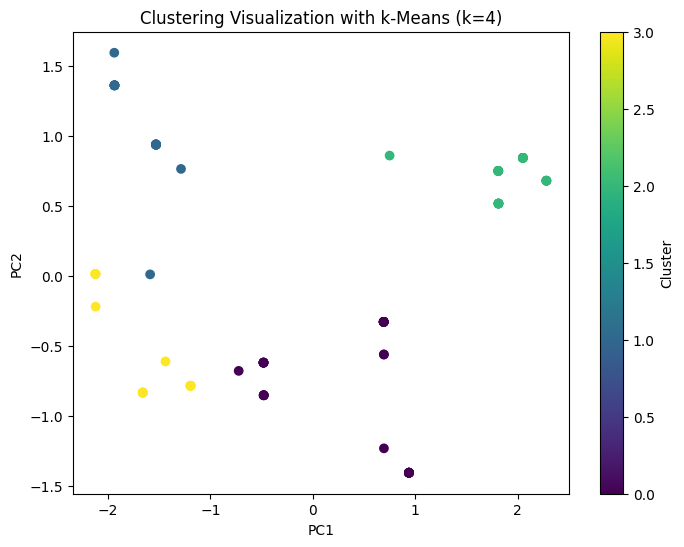


Hasil clustering telah disimpan ke 'clustering_results.csv'.


In [3]:
# 03_eksperimen_metode.ipynb

import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load preprocessed data
data = pd.read_csv('preprocessed_data.csv')

# Eksperimen dengan k-Means
print("Hasil K-Means:")
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    print(f"k: {k}, Silhouette Score: {score:.2f}")

# Eksperimen dengan DBSCAN
print("\nHasil DBSCAN:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(data)

# Evaluasi DBSCAN
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
silhouette_dbscan = silhouette_score(data, labels_dbscan) if n_clusters_dbscan > 1 else "N/A"
print(f"Number of clusters: {n_clusters_dbscan}, Silhouette Score: {silhouette_dbscan}")

# Eksperimen dengan Agglomerative Clustering
print("\nHasil Agglomerative Clustering:")
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels_agg = agg_clustering.fit_predict(data)
score_agg = silhouette_score(data, labels_agg)
print(f"Silhouette Score: {score_agg:.2f}")

# Visualisasi hasil clustering menggunakan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Visualisasi untuk k-Means (contoh k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Clustering Visualization with k-Means (k=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Simpan hasil clustering ke CSV
clustering_results = pd.DataFrame({'Cluster': kmeans_labels})
clustering_results.to_csv('clustering_results.csv', index=False)

print("\nHasil clustering telah disimpan ke 'clustering_results.csv'.")
